Dependencies for this notebook  

In [1]:
# CLIP and Tokenizer Exploration
# This notebook demonstrates the usage of CLIP model and tokenizers for image-text understanding

# Importing required libraries
import torch
from PIL import Image
import requests
from transformers import CLIPProcessor, CLIPModel
import matplotlib.pyplot as plt
import seaborn as sns

# Check if CUDA is available and set the device
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Load the CLIP model and processor
model_name = "openai/clip-vit-base-patch32"
model = CLIPModel.from_pretrained(model_name).to(device)
processor = CLIPProcessor.from_pretrained(model_name)
print("CLIP model and processor loaded successfully.")

Using device: cpu


c:\Users\Javier\Documents\GitHub\machine_learning_studies\myenv\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


CLIP model and processor loaded successfully.


This code sets up our environment by:

1. Importing necessary libraries (torch, PIL, requests, and transformers).
2. Checking for CUDA availability to utilize GPU if possible.
3. Loading the CLIP model and processor.

Now, let's add a section to load and preprocess an image:

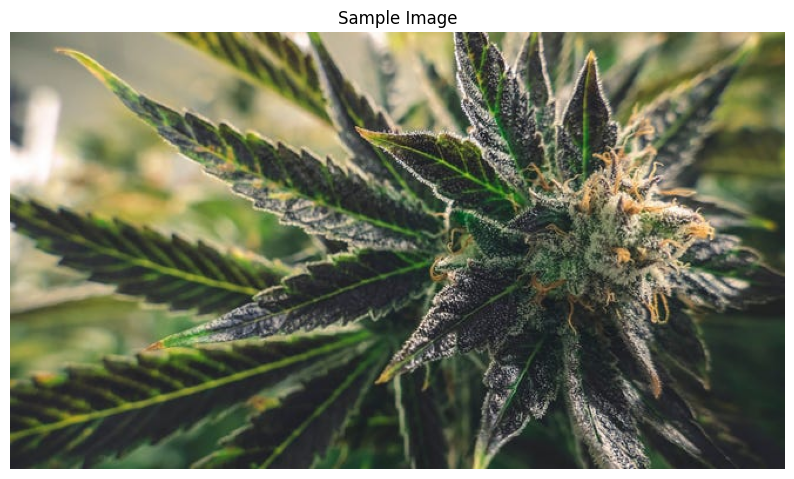

Image loaded and preprocessed successfully.


In [2]:
# Function to load an image from a URL
def load_image_from_url(url):
    return Image.open(requests.get(url, stream=True).raw)

# Load a sample image
image_url = "https://www.rgj.com/gcdn/-mm-/27bc5bfd67b6e09a7c240d2b85dae3f0f2cc083b/c=0-188-2000-1313/local/-/media/2019/12/28/USATODAY/usatsports/MotleyFool-TMOT-5ca7a690-b025b85e.jpg?width=660&height=372&fit=crop&format=pjpg&auto=webp"  # Replace with your image URL
image = load_image_from_url(image_url)

# Display the image
plt.figure(figsize=(10, 6))
plt.imshow(image)
plt.axis('off')
plt.title("Sample Image")
plt.show()
# Preprocess the image
inputs = processor(images=image, return_tensors="pt").to(device)

print("Image loaded and preprocessed successfully.")


This section:

1. Defines a function to load images from URLs.
2. Loads a sample image (you'll need to provide a valid URL).
3. Displays the image.
4. Preprocesses the image for the CLIP model.
Next, let's add a section to process text inputs:

In [3]:
# Define some text inputs
texts = ["an marihuana bud in his flowering stage", "an catnip bud in his flowering stage"]

# Tokenize and encode the text inputs
text_inputs = processor(text=texts, padding=True, return_tensors="pt").to(device)

print("Text inputs processed successfully:.")
print(text_inputs)


Text inputs processed successfully:.
{'input_ids': tensor([[49406,   550,  2603,   845,  1388, 10737,   530,   787, 19953,  2170,
         49407],
        [49406,   550,  1481, 22333, 10737,   530,   787, 19953,  2170, 49407,
         49407]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]])}


This code defines text inputs and processes them for the CLIP model.

Now, let's look at the similarity computation section:

In [4]:
import torch
import torch.nn.functional as F

def compute_similarity_scores(model, image_features, text_features):
    """
    Compute cosine similarity between image and text features.
    
    Args:
    model (torch.nn.Module): The CLIP model
    image_features (torch.Tensor): Image features from the CLIP model
    text_features (torch.Tensor): Text features from the CLIP model
    
    Returns:
    torch.Tensor: Cosine similarity scores
    """
    with torch.no_grad():
        # Normalize features
        image_features = F.normalize(image_features, dim=-1)
        text_features = F.normalize(text_features, dim=-1)
        
        # Compute cosine similarity
        similarity = torch.matmul(image_features, text_features.T)
    
    return similarity

def print_similarity_results(texts, similarity):
    """
    Print similarity scores and the most similar text.
    
    Args:
    texts (list): List of text descriptions
    similarity (torch.Tensor): Similarity scores
    """
    for i, text in enumerate(texts):
        print(f"Similarity between image and '{text}': {similarity[0][i].item():.4f}")

    most_similar_idx = similarity.argmax().item()
    print(f"\nThe image is most similar to: '{texts[most_similar_idx]}'")

# Example usage:
# Assuming you have already loaded the model and processed inputs

# Get features
image_features = model.get_image_features(**inputs)
text_features = model.get_text_features(**text_inputs)

# Compute similarity scores
similarity = compute_similarity_scores(model, image_features, text_features)

# Print results
print_similarity_results(texts, similarity)


Similarity between image and 'an marihuana bud in his flowering stage': 0.2772
Similarity between image and 'an catnip bud in his flowering stage': 0.2199

The image is most similar to: 'an marihuana bud in his flowering stage'


This code defines functions to compute and display similarity scores between the image and text inputs.

Finally, let's visualize the results:

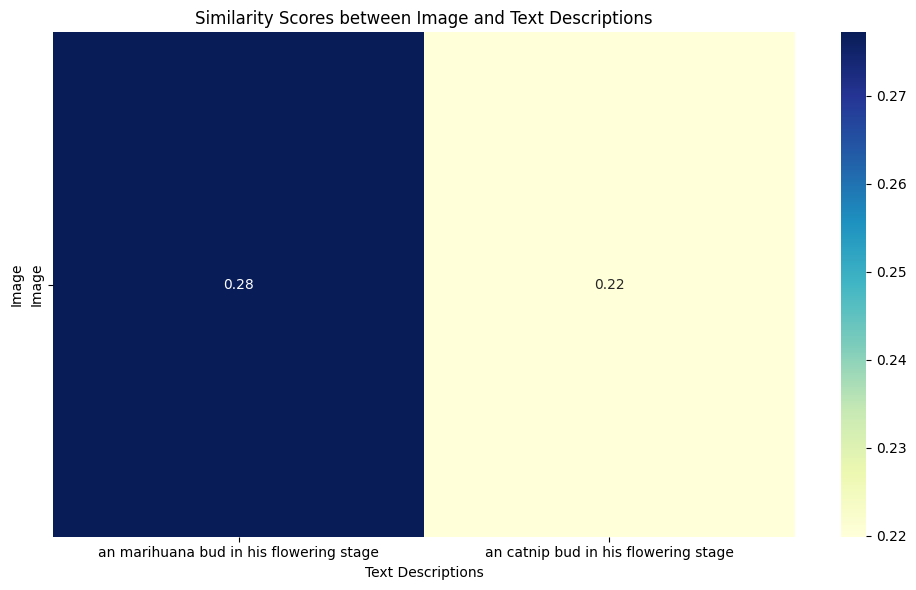

In [5]:
# Results Visualization

# Create a heatmap of similarity scores
plt.figure(figsize=(10, 6))
sns.heatmap(similarity.cpu().numpy(), annot=True, cmap='YlGnBu', xticklabels=texts, yticklabels=['Image'])
plt.title('Similarity Scores between Image and Text Descriptions')
plt.xlabel('Text Descriptions')
plt.ylabel('Image')
plt.tight_layout()
plt.show()


This code creates a heatmap to visualize the similarity scores between the image and text descriptions.

Device and Pyorch

to(device):
This moves the processed input tensors to the same device as the model, ensuring compatibility.





The processor in CLIP is a crucial component that prepares raw inputs (images and text) for the model. It's responsible for:

1. Resizing and normalizing images
2- Tokenizing and encoding text

Let's break down what the processor does:

For images:

In [8]:
processor = CLIPProcessor.from_pretrained(model_name)
image_input = processor(images=image, return_tensors="pt")
print(image_input)


c:\Users\Javier\Documents\GitHub\machine_learning_studies\myenv\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


{'pixel_values': tensor([[[[-0.6244, -0.7558, -0.7412,  ...,  0.0763,  0.0763,  0.0471],
          [-0.1426, -0.3908, -0.6098,  ..., -0.0405,  0.0325,  0.0617],
          [ 0.3975,  0.1201, -0.1718,  ..., -0.1572,  0.0033,  0.1055],
          ...,
          [-0.9748, -1.1061, -1.1353,  ...,  0.3975,  0.6895,  0.7479],
          [-1.0623, -1.1353, -1.1499,  ...,  0.1931,  0.7479,  0.5873],
          [-1.1207, -1.2229, -1.2229,  ...,  0.1347,  0.4997,  0.8647]],

         [[-0.5515, -0.7016, -0.6415,  ...,  0.1689,  0.1389,  0.1089],
          [-0.1163, -0.3714, -0.5215,  ...,  0.0638,  0.1239,  0.1539],
          [ 0.3640,  0.1539, -0.0862,  ..., -0.0262,  0.1089,  0.2139],
          ...,
          [-0.5065, -0.5965, -0.6865,  ...,  0.3490,  0.6041,  0.6191],
          [-0.6115, -0.6865, -0.7466,  ...,  0.1539,  0.6642,  0.4991],
          [-0.6865, -0.7616, -0.8216,  ...,  0.0789,  0.4090,  0.7692]],

         [[-1.0252, -0.9541, -0.9683,  ..., -0.2431, -0.2431, -0.2715],
          [-0

For text:


In [9]:
text_inputs = processor(text=texts, padding=True, return_tensors="pt")
print(text_inputs)

{'input_ids': tensor([[49406,   550,  2603,   845,  1388, 10737,   530,   787, 19953,  2170,
         49407],
        [49406,   550,  1481, 22333, 10737,   530,   787, 19953,  2170, 49407,
         49407]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]])}


1. Tokenizes the text (converts words to token IDs)
2. Adds special tokens (like [CLS] and [SEP])
3. Pads or truncates sequences to a fixed length
4. Converts the processed text to a PyTorch tensor
5. The processor ensures that both image and text inputs are in the correct format and scale for the CLIP model to process them effectively.

To illustrate this, let's look at what the processor outputs:

In [12]:
# Process an image
# Load a sample image
image_url = "https://www.rgj.com/gcdn/-mm-/27bc5bfd67b6e09a7c240d2b85dae3f0f2cc083b/c=0-188-2000-1313/local/-/media/2019/12/28/USATODAY/usatsports/MotleyFool-TMOT-5ca7a690-b025b85e.jpg?width=660&height=372&fit=crop&format=pjpg&auto=webp"  # Replace with your image URL

image = Image.open(requests.get(image_url, stream=True).raw)
image_inputs = processor(images=image, return_tensors="pt")

print("Image inputs:")
for key, value in image_inputs.items():
    print(f"{key}: shape {value.shape}, dtype {value.dtype}")

# Process some text
texts = ["a photo of a cat", "a dog playing in the park"]
text_inputs = processor(text=texts, padding=True, return_tensors="pt")

print("\nText inputs:")
for key, value in text_inputs.items():
    print(f"{key}: shape {value.shape}, dtype {value.dtype}")


Image inputs:
pixel_values: shape torch.Size([1, 3, 224, 224]), dtype torch.float32

Text inputs:
input_ids: shape torch.Size([2, 8]), dtype torch.int64
attention_mask: shape torch.Size([2, 8]), dtype torch.int64


This represents the processed image data:

### 1. Shape
[1, 3, 224, 224]
:
1: Number of images (batch size)
3: Number of color channels (RGB)
224, 224: Height and width of the image in pixels
### 2. dtype
torch.float32
: Each pixel value is a 32-bit floating-point number
The pixel_values tensor contains the normalized pixel values of the image. The processor has:

Resized the image to 224x224 pixels

Converted the image to RGB format (if it wasn't already)

Normalized the pixel values (typically to a range like [-1, 1] or [0, 1])

Text Inputs:

input_ids: shape torch.Size([2, 8]), dtype torch.int64
attention_mask: shape torch.Size([2, 8]), dtype torch.int64
a) input_ids:

### 1.a Shape
[2, 8]
:
2: Number of text samples (batch size)
8: Maximum sequence length (padded to this length)
### 2.a dtype
torch.int64
: Each value is a 64-bit integer
The input_ids tensor contains the tokenized representation of the text. Each integer corresponds to a token in the CLIP model's vocabulary.

b) attention_mask:

### 1.b Shape
[2, 8]
: Same as
input_ids
### 2.b dtype
torch.int64
: Each value is a 64-bit integer (0 or 1)
The attention_mask indicates which elements in the input_ids are actual tokens (1) and which are padding (0). This helps the model focus only on the relevant parts of the input.

Let's visualize this with some code:

This code will show you the structure of the processed inputs, helping you understand what the processor does to prepare data for the CLIP model.

📓: Understanding these concepts is crucial for effectively using PyTorch and the CLIP model. The to(device) method ensures efficient computation, while the processor prepares your raw data for the model. Is there anything specific about these processes you'd like me to elaborate on further?

